In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

Load data

In [2]:
hwfet_df = pd.read_csv("hwfet.txt", skiprows=1, sep="\t")
udds_df = pd.read_csv("udds.txt", skiprows=1, sep="\t")
us06_df = pd.read_csv("us06.txt", skiprows=1, sep="\t")

Find all derived columns

In [3]:
MPH_TO_KPH = 1.609344
MPHperSEC_TO_G = 0.0455853936

In [4]:
# Iterate through each df
for df in [hwfet_df, udds_df, us06_df]:
    # Convert velocity to km/h
    df["Target Speed (kph)"] = df["Target Speed (mph)"] * MPH_TO_KPH
    # Integrate velocity to find distance
    df["Distance (mi)"] = np.cumsum(df["Target Speed (mph)"] / 3600)
    # Differentiate to find acceleration
    df["Acceleration (g)"] = np.diff(df["Target Speed (mph)"], prepend=0) * MPHperSEC_TO_G

Create and show all plots

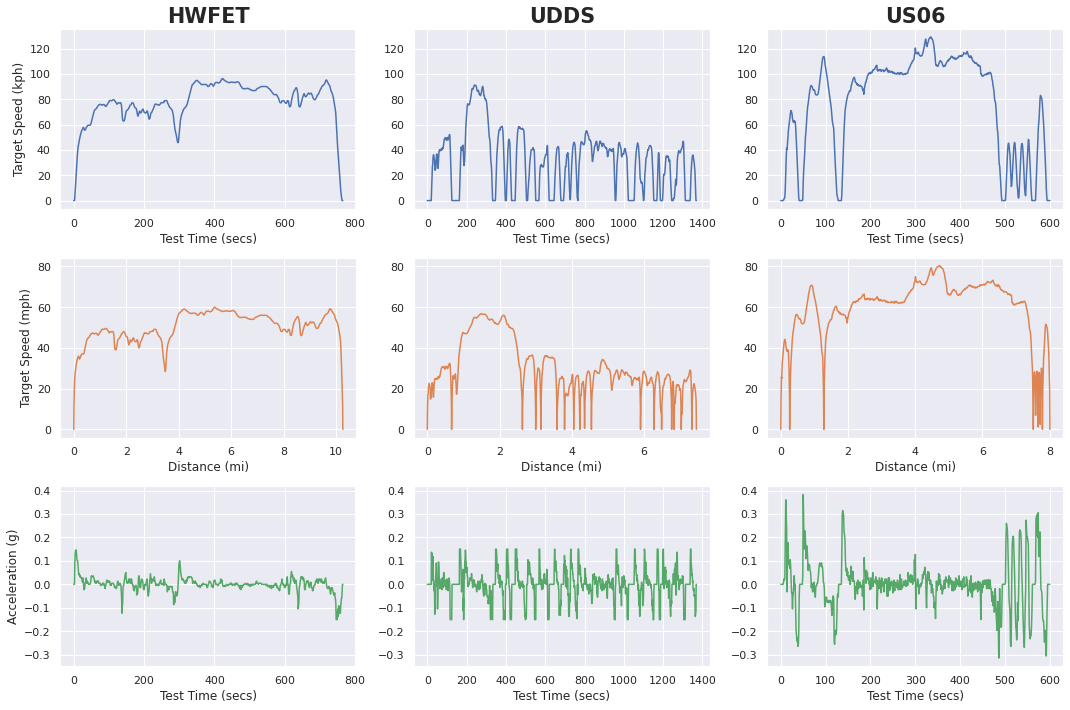

In [5]:
FIGSIZE = (15,10)
fig = plt.figure(figsize=FIGSIZE)

# Upper left
ax1 = fig.add_subplot(331)
ax1.set_title("HWFET", size="xx-large", fontweight="bold")
x1 = hwfet_df["Test Time (secs)"]
y1 = hwfet_df["Target Speed (kph)"]
ax1.plot(x1, y1, color="C0")
ax1.set_xlabel(x1.name)
ax1.set_ylabel(y1.name)

# Upper center
ax2 = fig.add_subplot(332, sharey=ax1)
ax2.set_title("UDDS", size="xx-large", fontweight="bold")
x2 = udds_df["Test Time (secs)"]
y2 = udds_df["Target Speed (kph)"]
ax2.plot(x2, y2, color="C0")
ax2.set_xlabel(x2.name)
# ax2.set_ylabel(y2.name)

# Upper right
ax3 = fig.add_subplot(333, sharey=ax1)
ax3.set_title("US06", size="xx-large", fontweight="bold")
x3 = us06_df["Test Time (secs)"]
y3 = us06_df["Target Speed (kph)"]
ax3.plot(x3, y3, color="C0")
ax3.set_xlabel(x3.name)
# ax3.set_ylabel(y3.name)

# Middle left
ax4 = fig.add_subplot(334)
x4 = hwfet_df["Distance (mi)"]
y4 = hwfet_df["Target Speed (mph)"]
ax4.plot(x4, y4, color="C1")
ax4.set_xlabel(x4.name)
ax4.set_ylabel(y4.name)

# Middle center
ax5 = fig.add_subplot(335, sharey=ax4)
x5 = udds_df["Distance (mi)"]
y5 = udds_df["Target Speed (mph)"]
ax5.plot(x5, y5, color="C1")
ax5.set_xlabel(x5.name)
# ax5.set_ylabel(y5.name)

# Middle right
ax6 = fig.add_subplot(336, sharey=ax4)
x6 = us06_df["Distance (mi)"]
y6 = us06_df["Target Speed (mph)"]
ax6.plot(x6, y6, color="C1")
ax6.set_xlabel(x6.name)
# ax6.set_ylabel(y6.name)

# Lower left
ax7 = fig.add_subplot(337)
x7 = hwfet_df["Test Time (secs)"]
y7 = hwfet_df["Acceleration (g)"]
ax7.plot(x7, y7, color="C2")
ax7.set_xlabel(x7.name)
ax7.set_ylabel(y7.name)

# Lower center
ax8 = fig.add_subplot(338, sharey=ax7)
x8 = udds_df["Test Time (secs)"]
y8 = udds_df["Acceleration (g)"]
ax8.plot(x8, y8, color="C2")
ax8.set_xlabel(x8.name)
# ax8.set_ylabel(y8.name)

# Lower right
ax9 = fig.add_subplot(339, sharey=ax7)
x9 = us06_df["Test Time (secs)"]
y9 = us06_df["Acceleration (g)"]
ax9.plot(x9, y9, color="C2")
ax9.set_xlabel(x9.name)
# ax9.set_ylabel(y9.name)

fig.tight_layout(pad=1)